## Digit Recognition using CNN

In [ ]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import StratifiedKFold
# from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import matplotlib.pyplot as plt

import timeit
import time 

2022-12-09 17:01:05.726660: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-09 17:01:06.139062: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-09 17:01:06.139115: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-09 17:01:06.240845: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-09 17:01:09.261732: W tensorflow/stream_executor/pla

In [ ]:
# Get data
mnist = tf.keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()
# Normalize data
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
# X_train = np.array([np.pad(x, (2, 2), 'constant') for x in X_train])
# X_test = np.array([np.pad(x, (2, 2), 'constant') for x in X_test])
# X_test.shape

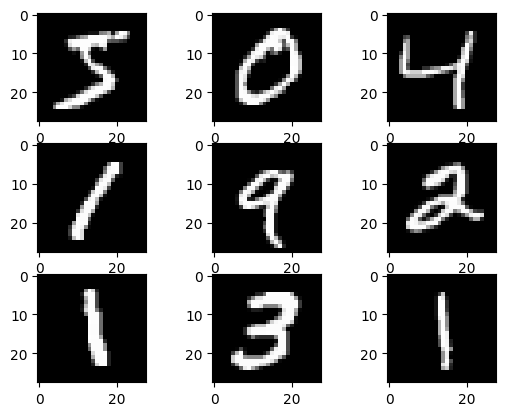

In [ ]:
for i in range(9):
    plt.subplot(int('33' + str(i+1)))
    plt.imshow(X_train[i], cmap = plt.get_cmap('gray'))

<BarContainer object of 10 artists>

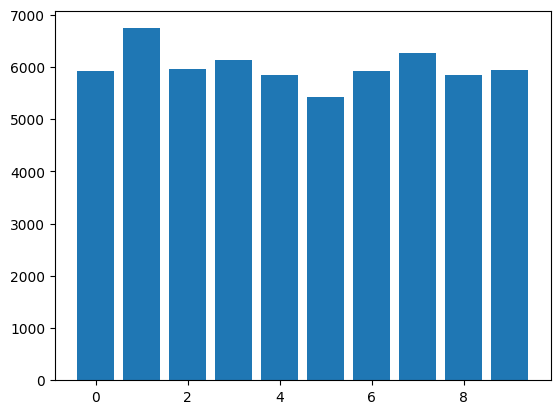

In [ ]:
plt.bar(np.unique(y_train), np.unique(y_train, return_counts=True)[1])

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype("float32")
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype("float32")

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
def create_lenet5_model():
# Creating CNN model with LeNet-5 architecture
    model = tf.keras.Sequential()

    model.add(layers.Conv2D(filters=6, kernel_size=(5,5), padding='same', 
                       activation=tf.nn.relu, input_shape = (28,28,1))) # C1

    model.add(layers.MaxPool2D(pool_size=(2,2), strides = (2,2))) # S2

    model.add(layers.Conv2D(filters=16, kernel_size=(5,5), padding='same', 
                       activation=tf.nn.relu)) # C3

    model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2))) # S4

    model.add(layers.Flatten()) 
    model.add(layers.Dense(120,activation=tf.nn.relu)) # C5
    model.add(layers.Dense(84,activation=tf.nn.relu)) # F6
    model.add(layers.Dense(10,activation=tf.nn.softmax)) # F7

    opt = tf.keras.optimizers.experimental.RMSprop()
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
lenet5_model = create_lenet5_model()

2022-12-09 17:01:35.811486: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-09 17:01:35.811534: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-09 17:01:35.811557: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-62bfbc7a-56e8-416a-a6e5-2c8f44c699f4): /proc/driver/nvidia/version does not exist
2022-12-09 17:01:35.811976: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# Hyperparameter tuning - dropped due to computational overload
# model = KerasClassifier(model=create_lenet5_model, loss='categorical_crossentropy', verbose=0)

# batch_size = [16, 32, 64, 128, 256, 512]
# epochs = [5, 10, 30]
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# param_grid = dict(optimizer=optimizer, batch_size = batch_size, epochs = epochs)

# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X_train, y_train)
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
b_size = 200
n_epochs = 10

start_time = time.time()

history = lenet5_model.fit(X_train, y_train, batch_size = b_size, epochs= n_epochs, verbose= 2, validation_data=(X_test, y_test))

elapsed_time = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

Epoch 1/10
2022-12-09 17:01:40.396579: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.
300/300 - 70s - loss: 0.3271 - accuracy: 0.9003 - val_loss: 0.0798 - val_accuracy: 0.9741 - 70s/epoch - 233ms/step
Epoch 2/10
300/300 - 70s - loss: 0.0812 - accuracy: 0.9738 - val_loss: 0.0543 - val_accuracy: 0.9812 - 70s/epoch - 232ms/step
Epoch 3/10
300/300 - 92s - loss: 0.0547 - accuracy: 0.9830 - val_loss: 0.0419 - val_accuracy: 0.9860 - 92s/epoch - 306ms/step
Epoch 4/10
300/300 - 103s - loss: 0.0415 - accuracy: 0.9872 - val_loss: 0.0357 - val_accuracy: 0.9889 - 103s/epoch - 344ms/step
Epoch 5/10
300/300 - 110s - loss: 0.0326 - accuracy: 0.9897 - val_loss: 0.0315 - val_accuracy: 0.9895 - 110s/epoch - 368ms/step
Epoch 6/10
300/300 - 112s - loss: 0.0265 - accuracy: 0.9916 - val_loss: 0.0435 - val_accuracy: 0.9849 - 112s/epoch - 374ms/step
Epoch 7/10
300/300 - 107s - loss: 0.0220 - accuracy: 0.9928 - val_loss: 0.0297 - val_accuracy: 0.

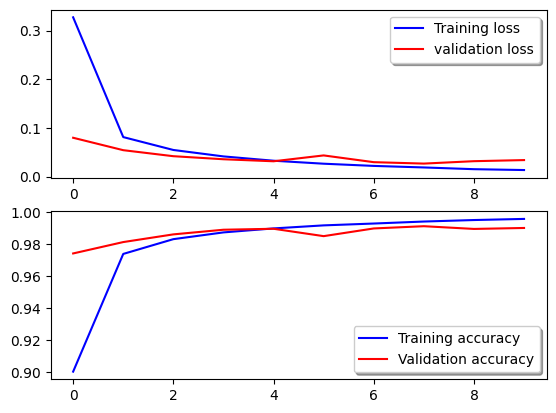

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
y_pred = lenet5_model.predict(X_test)

y_act_classes = np.argmax(y_test,axis = 1) 
y_pred_classes = np.argmax(y_pred, axis = 1)

confusion_matrix(y_act_classes, y_pred_classes)

313/313 [==============================] - 9s 27ms/step


array([[ 979,    0,    0,    0,    0,    0,    0,    1,    0,    0],
       [   0, 1127,    1,    1,    0,    2,    0,    4,    0,    0],
       [   3,    0, 1019,    0,    0,    0,    0,    8,    2,    0],
       [   0,    0,    1,  999,    0,    3,    0,    4,    3,    0],
       [   0,    0,    1,    0,  977,    0,    0,    1,    0,    3],
       [   1,    0,    0,    6,    0,  882,    2,    0,    0,    1],
       [   6,    2,    0,    0,    2,    3,  945,    0,    0,    0],
       [   0,    1,    1,    0,    0,    0,    0, 1024,    1,    1],
       [   5,    0,    1,    1,    0,    1,    1,    2,  959,    4],
       [   0,    1,    0,    0,    6,    3,    0,    9,    1,  989]])

In [ ]:
lenet5_model.evaluate(X_test, y_test)

313/313 [==============================] - 10s 28ms/step - loss: 0.0339 - accuracy: 0.9900


[0.03393759950995445, 0.9900000095367432]

In [ ]:
lenet5_model.save('cnn_model.h5')
print("The model has been saved successfully")

The model has been saved successfully


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=62bfbc7a-56e8-416a-a6e5-2c8f44c699f4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>